# Preprocessing OASIS1

In [1]:
# IMPORTS
# DATA MANIPULATION
import pandas as pd
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import set_config; set_config(display='diagram') # Visualize pipelines in HTML
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

# MACHINE LEARNING
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
# Importing Data
oasis1_cs_path = '../raw_data/OASIS1/oasis_cross-sectional.csv'
oasis1 = pd.read_csv(oasis1_cs_path)

In [3]:
# Checking shape
oasis1.shape

(436, 12)

📜 <big> Note: </big>


**CDR;** 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia

**eTIV;** Estimated total intracranial volume (eTIV)

**nWBV** Normalized whole brain volume

**ASF;** Atlas scaling factor

In [4]:
oasis1.sample(20)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
119,OAS1_0129_MR1,M,R,18,NaN,NaN,NaN,NaN,1514,0.846,1.159,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
69,OAS1_0074_MR1,M,R,43,4.0,NaN,30.0,0.0,1547,0.847,1.134,NaN
369,OAS1_0407_MR1,F,R,55,NaN,NaN,NaN,NaN,1434,0.807,1.224,NaN
73,OAS1_0078_MR1,F,R,64,3.0,2.0,30.0,0.0,1395,0.809,1.258,NaN
72,OAS1_0077_MR1,F,R,20,NaN,NaN,NaN,NaN,1537,0.852,1.142,NaN
87,OAS1_0094_MR1,F,R,66,2.0,3.0,30.0,0.5,1447,0.772,1.213,NaN
382,OAS1_0422_MR1,F,R,69,4.0,3.0,29.0,0.0,1380,0.809,1.272,NaN
159,OAS1_0173_MR1,M,R,35,NaN,NaN,NaN,NaN,1475,0.829,1.190,NaN
391,OAS1_0432_MR1,F,R,72,2.0,4.0,26.0,0.5,1453,0.773,1.208,NaN


## Data Preprocessing

**We want to define a function that:**

1. Drops rows that have no values for CDR (prediction)
2. Fills empty values for socioeconomic status with a value
3. Replaces Male with 1 and Female with 0
4. Converts CDR from 4 unique values to 2 unique values so that we now have a binary classification problem
5. Drops columns Delay and Handedness

In [5]:
def preprocess_data(oasis1):
    """This function removes CDR rows containing NANs, 
    fills SES missing values with status 3,
    encodes Male/Female M/F to 1 and 0,
    and drops columns Delay and Hand."""
    
    oasis1.dropna(subset = ["CDR"], inplace=True)
    oasis1['SES'].fillna(value=3, inplace=True) # Socioeconomic status 3 means that participants went to 'some college'
    oasis1['M/F'].replace({'F':0, 'M':1}, inplace = True) # Replaces M with 1 and F with 0
    oasis1["CDR"] = oasis1["CDR"].apply(lambda x: 1 if x>0 else 0) # Converts CDR so that we now have a binary classification problem
    oasis1.drop('Delay', inplace=True, axis=1)
    oasis1.drop('Hand', inplace=True, axis=1)
    
    return oasis1

In [6]:
preprocess_data(oasis1)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0,74,2.0,3.0,29.0,0,1344,0.743,1.306
1,OAS1_0002_MR1,0,55,4.0,1.0,29.0,0,1147,0.810,1.531
2,OAS1_0003_MR1,0,73,4.0,3.0,27.0,1,1454,0.708,1.207
8,OAS1_0010_MR1,1,74,5.0,2.0,30.0,0,1636,0.689,1.073
9,OAS1_0011_MR1,0,52,3.0,2.0,30.0,0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,0,70,1.0,4.0,29.0,1,1295,0.748,1.355
412,OAS1_0454_MR1,0,73,3.0,2.0,23.0,1,1536,0.730,1.142
413,OAS1_0455_MR1,0,61,2.0,4.0,28.0,0,1354,0.825,1.297
414,OAS1_0456_MR1,1,61,5.0,2.0,30.0,0,1637,0.780,1.072


### Testing my code

In [7]:
# Check shape again
oasis1.shape

(235, 10)

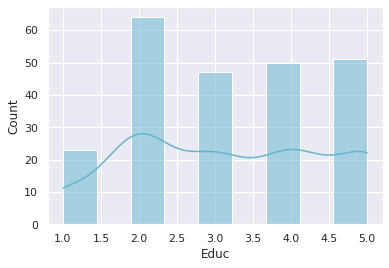

In [8]:
# Education is not normally distrbuted
sns.histplot(oasis1.Educ,kde = True, color = 'c');

In [9]:
# Check whether NANs are still here
oasis1.CDR.unique()

array([0, 1])

In [10]:
# Check SES column
oasis1.SES.unique()

array([3., 1., 2., 4., 5.])

In [11]:
# Check M/F column
oasis1['M/F']

0      0
1      0
2      0
8      1
9      0
      ..
411    0
412    0
413    0
414    1
415    0
Name: M/F, Length: 235, dtype: int64

In [12]:
# def gender_encoding(i):
#     """This function returns 0 for F and 1 for M"""
#     return i.map({'F':0, 'M':1})

## Defining variables

In [13]:
X = oasis1.drop(columns = ['CDR', 'ID'])
y = oasis1['CDR']

## Preprocessing pipeline

📜 Note: columns **nWBV and ASF** already normalized
 
 According to visualizations in file 'Demographic_visual.ipynb', we decided to scale as follows:
 
**Columns to scale:**

Standard Scale: age

Robust Scale: eTIV, MMSE

MinMax Scale: Educ

In [14]:
# Transformer for numerical features

def numerical_transformer():
    """This function transforms all numerical features according to their respective scalers
    """
    standard_features = ['Age']
    robust_features = ['eTIV', 'MMSE']
    minmax_features = ['Educ']
    numeric_transformer = ColumnTransformer([
        ('standard_scaler', StandardScaler(), standard_features),
        ('robust_scaler', RobustScaler(), robust_features),
        ('minmax_scaler', MinMaxScaler(), minmax_features),
         ], remainder = 'passthrough')
    
    return numeric_transformer
numeric_transformer = numerical_transformer()
numeric_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scaler', StandardScaler(), ['Age']),
                                ('robust_scaler', RobustScaler(),
                                 ['eTIV', 'MMSE']),
                                ('minmax_scaler', MinMaxScaler(), ['Educ'])])

In [15]:
def set_pipeline():
    """This function returns a pipeline
    """
    preproc = Pipeline([('numericals', numeric_transformer)])
    return preproc
set_pipeline()

Pipeline(steps=[('numericals',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(), ['Age']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['eTIV', 'MMSE']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['Educ'])]))])

In [16]:
def preproc_df():
    """This function returns a scaled dataframe ready for processing
    """
    # Instantiating pipeline
    pipeline = set_pipeline()
    X_scaled = pd.DataFrame(pipeline.fit_transform(X), columns = set_pipeline().get_feature_names_out())
    X_scaled.rename(columns={
                                 'remainder__M/F': 'M/F',
                                 'remainder__SES': 'SES',
                                 'remainder__nWBV': 'nWBV',
                                 'remainder__ASF': 'ASF',
                                 'standard_scaler__Age': 'Age',
                                 'robust_scaler__eTIV': 'eTIV',
                                 'robust_scaler__MMSE': 'MMSE',
                                 'minmax_scaler__Educ': 'Educ'
    }, inplace=True)
    X_scaled = X_scaled[["M/F", "Age", "Educ", "SES", "MMSE", "eTIV", "nWBV", "ASF"]]
    return X_scaled
X_scaled = preproc_df()

In [17]:
# Holdout
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state = 42)

In [18]:
# Length of y_test = 59
np.unique(y_test, return_counts = True)

# Length of X_test = 59
len(X_test)

59

# 🎰SVC

In [19]:
# Instantiating linear support vector classifier
model_svc = SVC(kernel = 'linear')

In [20]:
# Fitting LinearSVC
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred_SVC = model_svc.predict(X_test)

In [22]:
cm_svc = confusion_matrix(y_test, y_pred_SVC)
cm_svc

array([[34,  2],
       [ 7, 16]])

In [23]:
baseline_recall_svc = recall_score(y_test, y_pred_SVC)
baseline_recall_svc

0.6956521739130435

###   🤖  Grid Searching

In [24]:
# Creating a parameter grid: map the parameter names to the values that should be searched in a dictionary
param_grid = {'C':np.arange(700,750,1),'gamma':[1,0.1,0.001,0.0001]}

# GridSearching
gridsearch_svc = GridSearchCV(model_svc, 
                          param_grid, n_jobs = -1, 
                          scoring = 'recall', cv = 5)

# Fitting gridsearch on X and y
gridsearch_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712,
       713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
       739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749]),
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             scoring='recall')

In [25]:
gridsearch_svc.best_estimator_

SVC(C=717, gamma=1, kernel='linear')

### Best SVC

In [26]:
best_svc = gridsearch_svc.best_estimator_

In [27]:
best_svc.fit(X_train, y_train)

SVC(C=717, gamma=1, kernel='linear')

In [28]:
best_svc_pred = best_svc.predict(X_test)

In [29]:
recall_score(y_test, best_svc_pred)

0.782608695652174

#  🤹 K Neighbors Classifier

In [30]:
# Instantiating KNeighborsClassifier
neigh = KNeighborsClassifier()

### Grid Searching

In [31]:
# Defining the parameter values that should be searched
k_range = list(range(1, 31))

# Creating a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [32]:
# Performing a grid search
grid = GridSearchCV(neigh, 
                    param_grid, 
                    cv=10, 
                    scoring='recall')

In [33]:
# Fitting grid on train set
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='recall')

In [34]:
best_neigh = grid.best_estimator_

### Best Neigh model

In [35]:
# Fitting KNeighborsClassifier
best_neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
best_neigh_pred = best_neigh.predict(X_test)

In [37]:
recall_score(y_test, best_neigh_pred)

0.6521739130434783

# 🌳Decision Tree

## Trial (just to practice)

In [38]:
# Making a copy of X_scaled
X_train_trial = X_train.copy()
X_train_trial

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
104,0.0,-1.437530,1.00,1.0,0.00,-0.395,0.823,1.283
172,1.0,0.717354,0.00,4.0,-0.25,1.515,0.676,1.003
171,0.0,0.634474,0.00,4.0,-0.50,1.035,0.678,1.061
111,1.0,0.965995,0.25,3.0,-2.25,0.970,0.703,1.070
222,1.0,0.717354,1.00,1.0,0.00,1.000,0.721,1.066
...,...,...,...,...,...,...,...,...
106,0.0,0.137193,0.50,3.0,-0.25,0.835,0.697,1.087
14,0.0,-1.188889,1.00,1.0,0.25,-1.060,0.820,1.421
92,1.0,0.965995,1.00,1.0,0.00,1.300,0.731,1.028
179,1.0,1.131755,0.00,4.0,-3.50,0.325,0.665,1.161


In [39]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([99, 77]))

In [40]:
# Instantiating Decision Tree
tree_clf = DecisionTreeClassifier(max_depth = 5)

In [41]:
# Fitting decision tree
tree_clf.fit(X_train_trial,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
# Predicting X_test
prediction = tree_clf.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [43]:
# Accuracy
recall_score(y_test, prediction)

0.782608695652174

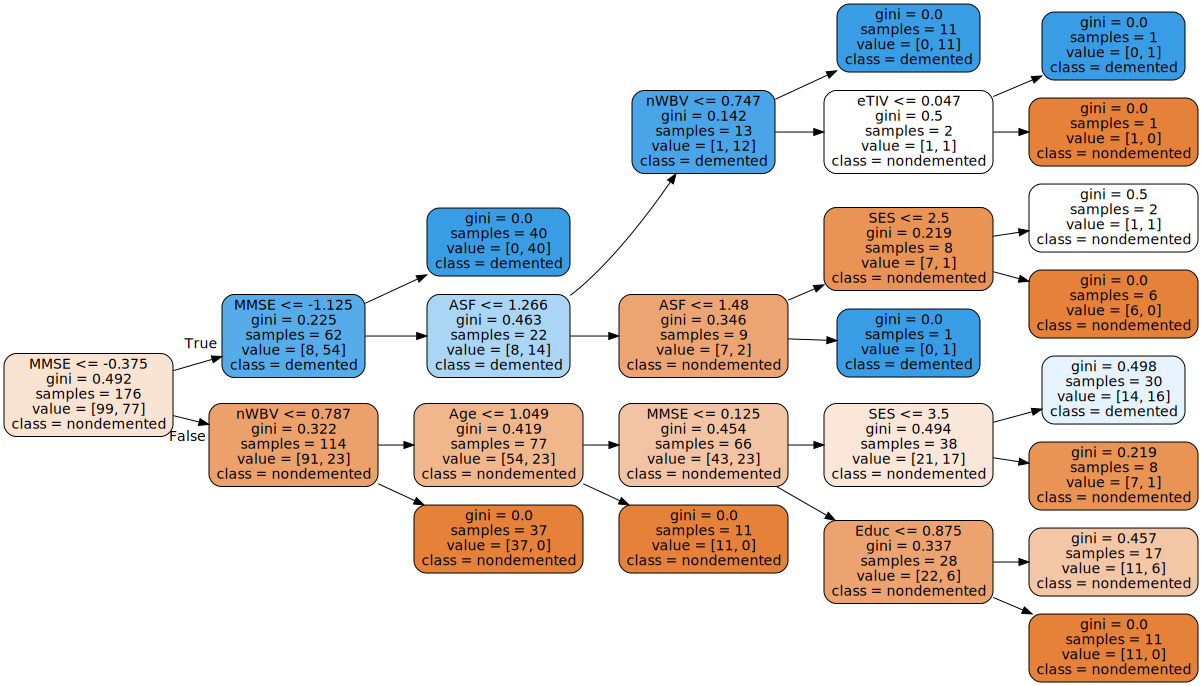

In [44]:
# Export model graph
export_graphviz(tree_clf, out_file="oasis1_tree.dot", 
                feature_names=X_train_trial.columns,
                class_names=['nondemented', 'demented'], 
                rounded=True,
                filled=True,
                rotate = True,
                fontname = 'futura')

# Import model graph
with open("oasis1_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 🤖 Grid Searching

In [45]:
# Parameters to grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1,10),
              'min_samples_split': range(2,10),
              'min_samples_leaf': range(2,10)
             #'max_features': range(0,len(X_train.columns),
              }

In [46]:
# GridSearching
gridsearch = GridSearchCV(DecisionTreeClassifier(), 
                          parameters, n_jobs = -1, 
                          scoring = 'recall', cv = 5)

# Fitting gridsearch on X and y
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             scoring='recall')

In [47]:
# Best parameters
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

### 🌲 Best Tree

In [48]:
# Instantiating best tree
best_tree = gridsearch.best_estimator_

# Fitting best tree
best_tree.fit(X_train_trial, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)

In [49]:
# Predictions
y_pred = best_tree.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [50]:
np.unique(y_pred, return_counts = True)

(array([0, 1]), array([35, 24]))

In [51]:
# Recall score
recall_score(y_test, y_pred)

0.782608695652174

In [52]:
# Best score according to gridsearch
gridsearch.best_score_

0.8058333333333334

In [53]:
best_tree_2 = gridsearch.best_estimator_

In [54]:
best_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)

In [55]:
predictions2 = best_tree_2.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, predictions2)
cm

array([[32,  4],
       [ 6, 17]])

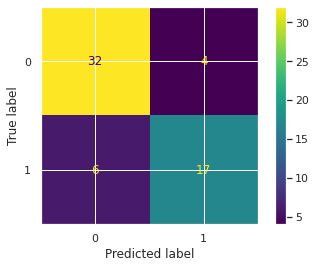

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[0,1])
disp.plot()

plt.show()

In [58]:
y_train.value_counts()

0    99
1    77
Name: CDR, dtype: int64

In [59]:
y_test.value_counts()
# We want to capture all 23 people with dementia

0    36
1    23
Name: CDR, dtype: int64

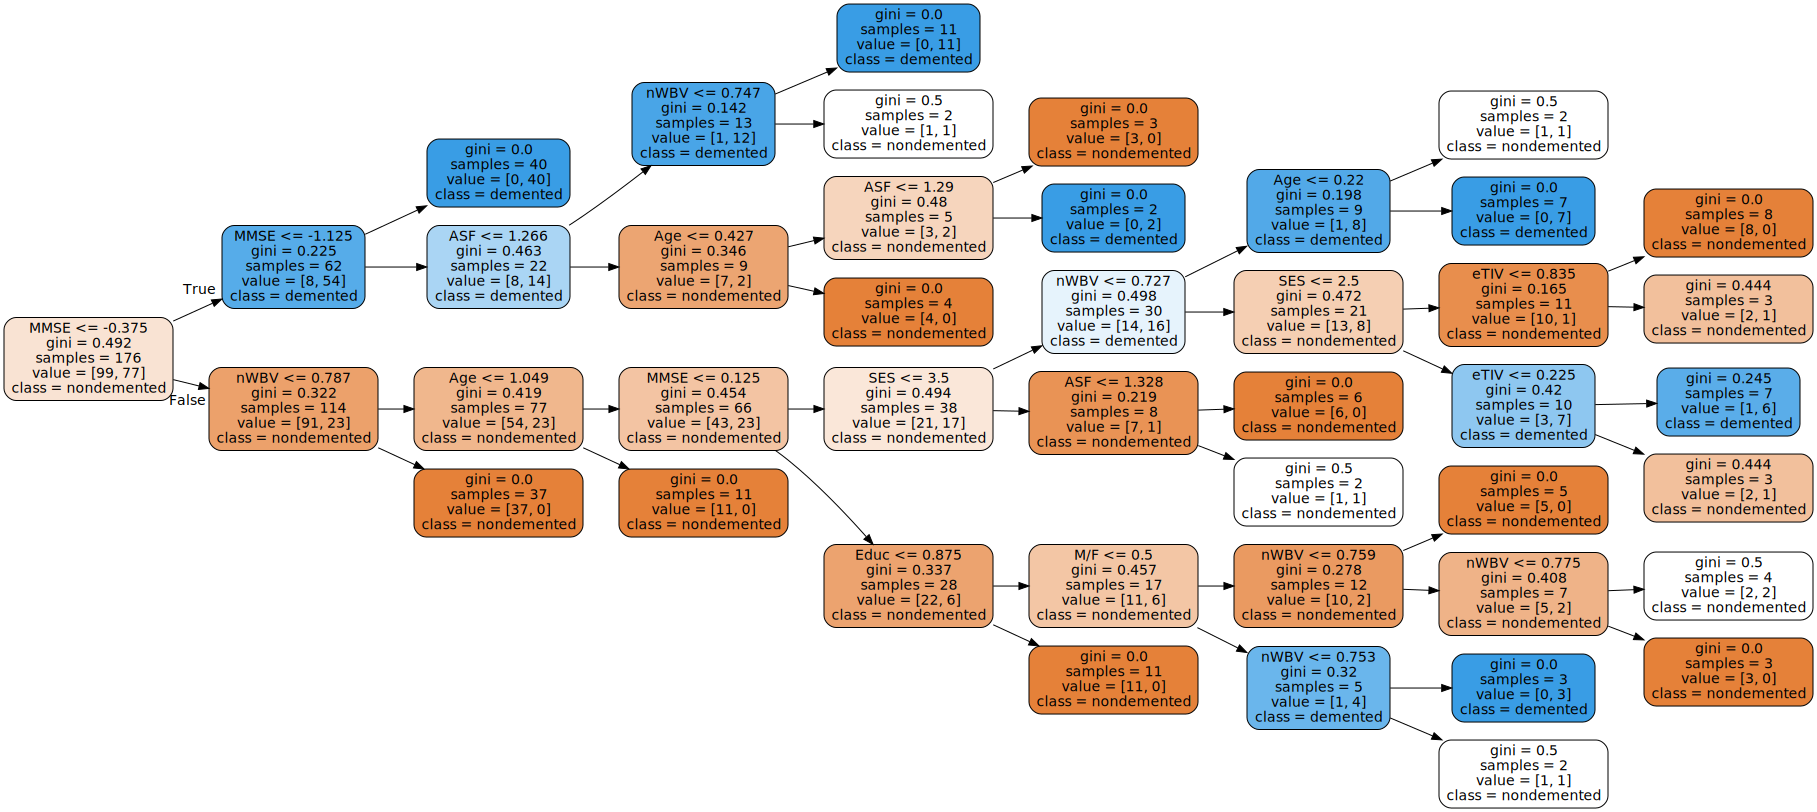

In [60]:
# Export model graph
export_graphviz(best_tree, out_file="best_tree.dot", 
                feature_names=X_train_trial.columns,
                class_names=['nondemented', 'demented'], 
                rounded=True,
                filled=True,
                rotate = True,
                fontname = 'futura')

# Import model graph
with open("best_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

<big> Conclusion: </big>

y_train = 76 demented, 100 nondemented

y_pred = 61 demented, 115 nondemented